# Importation des bibliothèques

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import csv

# Définition des fonctions utiles

In [2]:
#Import the df

def turing_data(df, indexf):
    columns_to_drop = np.array([])
    for i in range(8):
        columns_to_drop = np.append(columns_to_drop,df.columns[i])
    df = df.drop(columns_to_drop, axis = 1)
    columns = {}

    for i in range(21):
        if(i>1):
            key = "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n"+"\n"+str(i)
        elif(i==0):
            key = "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n"
        else :
            key = "Indiquez votre certitude dans le fait que c'est un humain qui a pris la décision ?\n\n"

        columns[key] = i
    df.rename(columns=columns,
                    inplace=True,
                    errors='raise')

    index = sorted(indexf.items(), key=lambda t: t[1] == "CH")
    index = sorted(index, key=lambda t: t[1] == "3RH")
    index = sorted(index, key=lambda t: t[1] == "2RH")
    index = sorted(index, key=lambda t: t[1] == "CR")
    index = sorted(index, key=lambda t: t[1] == "3RR")
    index = sorted(index, key=lambda t: t[1] == "2RR")
    index = sorted(index, key=lambda t: t[1] == "CI")


    columns = np.array([])
    for i in range(21) :
        columns = np.append(columns, int(index[i][0]))
    df = df.reindex(columns = columns.astype(int))
    df = df.rename(columns = indexf)
    return df


In [3]:
def graph(df):
    sns.set(font_scale = 1)
    graph = sns.displot(df, kde = True, palette= "mako", multiple = "dodge", aspect=2, alpha = 0.25, legend= False)
    graph.set( title = "Distribution of the estimation of the human or artificial nature, of a human or artificial decision making", 
              xlabel = "Estimation of an artificial decision making (0) or a human decision making (10)", 
              xticks=[0,1,2,3,4,5,6,7,8,9,10], 
              ylabel = "Number of estimations")
    plt.legend(title = "Decision making",  labels=['Human inversed', 'Artificial', 'Human'], fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.show()

# Importation et organisation des datasets

In [4]:
dataf1 = pd.read_csv("form1.csv", sep=";", encoding='latin-1')
indexf1={0 : "CR",
       1 : "3RH",
       2 : "2RR",
       3 : "3RR",
       4 : "CH",
       5 : "CI",
       6 : "2RH",
       7 : "3RH",
       8 : "3RR",
       9 : "CI",
       10 : "2RH",
       11 : "CR",
       12 : "2RR",
       13 : "CH",
       14 : "2RH",
       15 : "3RR",
       16 : "3RH",
       17 : "CI",
       18 : "2RR",
       19 : "CH",
       20 :"CR"}
dataf1 = turing_data(dataf1, indexf1)
dataf1

,CH,CH,CH,3RH,3RH,3RH,2RH,2RH,2RH,CR,...,CR,3RR,3RR,3RR,2RR,2RR,2RR,CI,CI,CI
0,5,8,6,0,8,0,2,8,2,7,...,7,3,2,5,8,2,3,0,8,3
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,10,10,0,0,10,0,0,4,10,2,...,0,2,3,5,2,10,9,0,2,0
3,5,10,10,7,5,0,0,0,10,7,...,10,2,3,10,9,10,10,0,0,0
4,3,1,0,10,2,6,0,2,6,9,...,9,5,8,3,10,2,5,7,8,0
5,8,7,5,9,7,7,1,7,4,7,...,7,6,6,9,4,9,6,6,3,3
6,7,8,6,7,3,6,8,3,3,10,...,3,3,3,8,8,8,4,4,8,3
7,4,4,4,6,7,8,5,4,5,5,...,7,3,6,2,6,7,8,6,6,5
8,9,8,4,2,9,2,2,6,5,7,...,4,6,7,9,7,7,7,2,2,2
9,8,10,7,0,8,0,0,0,9,5,...,0,8,3,9,8,7,7,0,0,0


In [5]:
dataf2 = pd.read_csv("form2.csv", sep=";", encoding='latin-1')
indexf2={0 : "CH",
       1 : "2RR",
       2 : "2RH",
       3 : "3RR",
       4 : "CR",
       5 : "CI",
       6 : "3RH",
       7 : "CH",
       8 : "3RH",
       9 : "2RH",
       10 : "2RR",
       11 : "CR",
       12 : "3RR",
       13 : "CI",
       14 : "CI",
       15 : "3RH",
       16 : "CR",
       17 : "3RR",
       18 : "CH",
       19 : "2RH",
       20 : "2RR"}
dataf2 = turing_data(dataf2, indexf2)
dataf2

,CH,CH,CH,3RH,3RH,3RH,2RH,2RH,2RH,CR,...,CR,3RR,3RR,3RR,2RR,2RR,2RR,CI,CI,CI
0,8,5,10,3,10,2,5,5,5,8,...,2,9,10,9,7,8,5,10,10,10
1,10,10,10,10,10,10,10,10,10,10,...,10,10,9,10,10,10,10,10,10,10
2,5,6,3,8,8,10,5,8,0,5,...,8,5,3,7,5,5,6,1,0,4
3,10,8,7,7,7,7,10,8,7,10,...,7,7,10,7,6,10,7,10,10,7
4,0,10,0,10,9,10,3,10,10,2,...,8,10,2,8,9,10,10,0,0,0
5,3,8,1,9,3,9,0,8,7,10,...,8,6,2,9,8,9,8,0,1,0
6,0,9,5,9,7,0,1,2,5,8,...,0,1,7,5,7,2,5,2,8,2
7,3,7,3,7,0,2,1,6,4,9,...,7,6,5,6,7,2,5,0,2,3
8,8,8,1,3,9,2,8,9,8,2,...,2,2,1,9,9,7,1,4,7,1
9,10,9,4,8,3,9,5,8,9,9,...,4,10,8,8,5,8,9,0,4,5


In [6]:
dataf3 = pd.read_csv("form3.csv", sep=";", encoding='latin-1')
indexf3={0 : "3RH",
       1 : "CI",
       2 : "CH",
       3 : "CR",
       4 : "3RR",
       5 : "2RH",
       6 : "2RR",
       7 : "CR",
       8 : "3RH",
       9 : "CH",
       10 : "2RH",
       11 : "CI",
       12 : "2RR",
       13 : "3RR",
       14 : "3RH",
       15 : "CI",
       16 : "3RR",
       17 : "CR",
       18 : "2RR",
       19 : "2RH",
       20 : "CH"}
dataf3 = turing_data(dataf3, indexf3)
dataf3

,CH,CH,CH,3RH,3RH,3RH,2RH,2RH,2RH,CR,...,CR,3RR,3RR,3RR,2RR,2RR,2RR,CI,CI,CI
0,10,0,10,10,0,6,10,10,0,10,...,6,5,10,0,0,0,10,10,10,10
1,7,6,3,8,9,2,1,5,8,6,...,8,4,4,8,6,8,7,2,2,3
2,8,7,4,7,7,3,2,7,8,8,...,7,4,8,7,7,6,6,3,4,6
3,5,8,10,10,8,10,6,5,8,9,...,9,2,5,10,9,7,10,9,3,10
4,5,5,6,9,7,2,2,6,6,1,...,2,5,5,7,3,4,6,1,3,2
5,7,7,2,10,8,5,2,2,8,10,...,8,6,5,9,6,3,8,0,2,2
6,9,3,8,10,1,8,9,7,5,2,...,2,9,2,2,9,3,2,9,9,8
7,5,10,7,8,3,8,10,2,5,8,...,6,7,7,5,7,10,8,0,4,2
8,8,10,8,5,8,0,5,9,1,10,...,8,7,8,7,3,10,9,0,2,5
9,10,10,7,10,10,5,8,10,6,10,...,8,4,7,10,5,7,10,3,0,2


In [7]:
data = pd.concat([dataf1,dataf2,dataf3])
data

,CH,CH,CH,3RH,3RH,3RH,2RH,2RH,2RH,CR,...,CR,3RR,3RR,3RR,2RR,2RR,2RR,CI,CI,CI
0,5,8,6,0,8,0,2,8,2,7,...,7,3,2,5,8,2,3,0,8,3
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,10,10,0,0,10,0,0,4,10,2,...,0,2,3,5,2,10,9,0,2,0
3,5,10,10,7,5,0,0,0,10,7,...,10,2,3,10,9,10,10,0,0,0
4,3,1,0,10,2,6,0,2,6,9,...,9,5,8,3,10,2,5,7,8,0
5,8,7,5,9,7,7,1,7,4,7,...,7,6,6,9,4,9,6,6,3,3
6,7,8,6,7,3,6,8,3,3,10,...,3,3,3,8,8,8,4,4,8,3
7,4,4,4,6,7,8,5,4,5,5,...,7,3,6,2,6,7,8,6,6,5
8,9,8,4,2,9,2,2,6,5,7,...,4,6,7,9,7,7,7,2,2,2
9,8,10,7,0,8,0,0,0,9,5,...,0,8,3,9,8,7,7,0,0,0


In [8]:
label = {"human" : ["CH","3RH","2RH"],
         "robot" : ["CR","3RR","2RR"],
         "inversed" : ["CI"]}
columns = {}
for i in range(21):
    if data.columns[i] in label["human"] :
        columns[data.columns[i]] = "human"
    elif data.columns[i] in label["robot"] :
        columns[data.columns[i]] = "robot"
    elif data.columns[i] in label["inversed"] :
        columns[data.columns[i]] = "inversed"

data.rename(columns=columns,
                    inplace=True,
                    errors='raise')
data

,human,human,human,human,human,human,human,human,human,robot,...,robot,robot,robot,robot,robot,robot,robot,inversed,inversed,inversed
0,5,8,6,0,8,0,2,8,2,7,...,7,3,2,5,8,2,3,0,8,3
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,10,10,0,0,10,0,0,4,10,2,...,0,2,3,5,2,10,9,0,2,0
3,5,10,10,7,5,0,0,0,10,7,...,10,2,3,10,9,10,10,0,0,0
4,3,1,0,10,2,6,0,2,6,9,...,9,5,8,3,10,2,5,7,8,0
5,8,7,5,9,7,7,1,7,4,7,...,7,6,6,9,4,9,6,6,3,3
6,7,8,6,7,3,6,8,3,3,10,...,3,3,3,8,8,8,4,4,8,3
7,4,4,4,6,7,8,5,4,5,5,...,7,3,6,2,6,7,8,6,6,5
8,9,8,4,2,9,2,2,6,5,7,...,4,6,7,9,7,7,7,2,2,2
9,8,10,7,0,8,0,0,0,9,5,...,0,8,3,9,8,7,7,0,0,0


# Analyse de données 

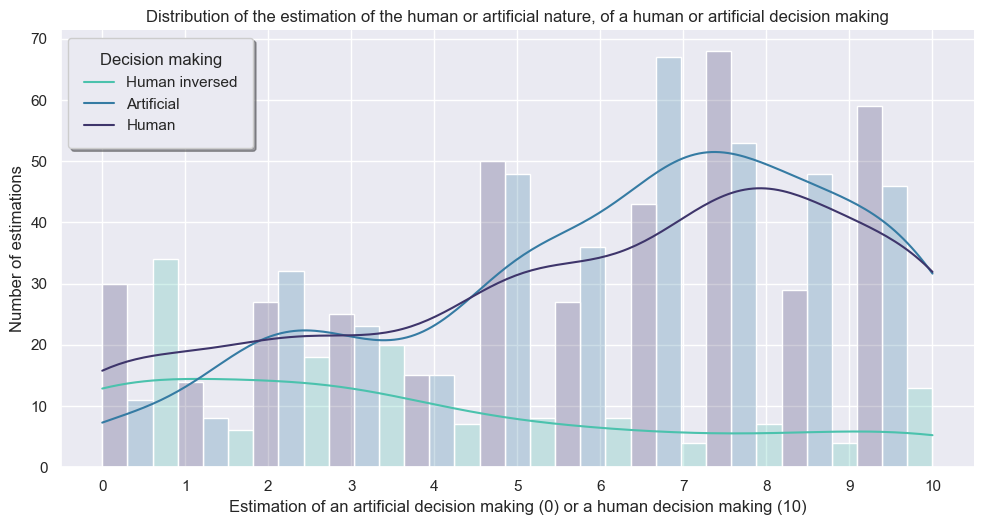

In [9]:
graph(data)

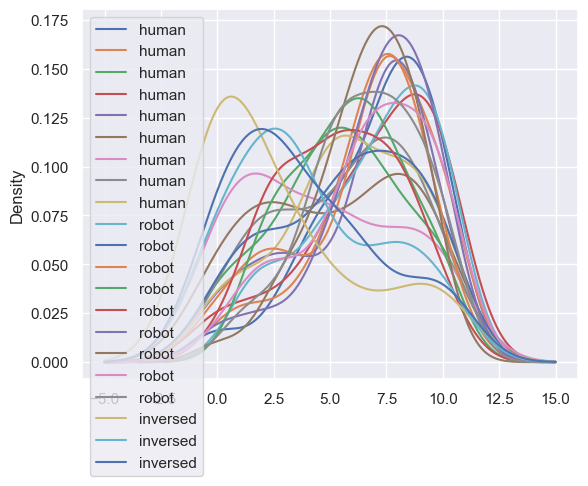

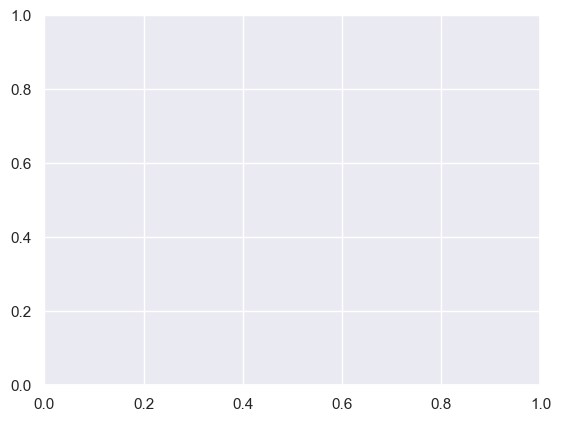

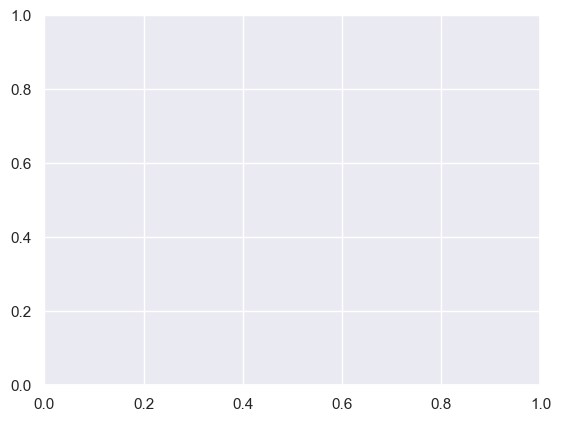

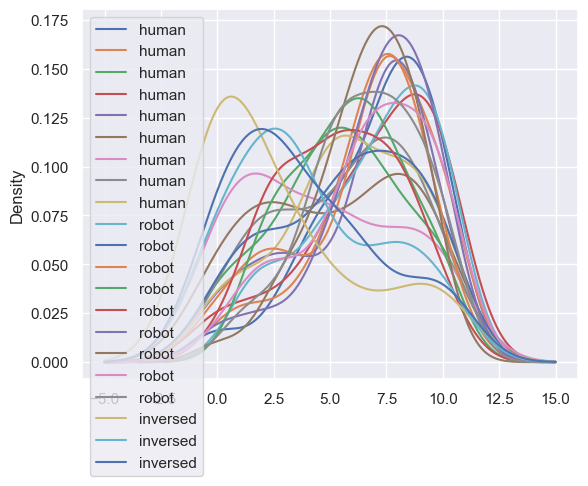

In [37]:
data.plot.kde()
plt.show()